In [141]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
resist="Resistència "
import os

if not os.path.exists("images"):
    os.mkdir("images")
import matplotlib.pyplot as plt


In [208]:
m100=pd.read_csv("Mag/P1/100.csv")
m200=pd.read_csv("Mag/P1/200.csv")
m300=pd.read_csv("Mag/P1/300.csv")
m400=pd.read_csv("Mag/P1/400.csv")
m440=pd.read_csv("Mag/P1/440.csv")
m550=pd.read_csv("Mag/P1/550.csv")
m700=pd.read_csv("Mag/P1/700.csv")
m750=pd.read_csv("Mag/P1/750.csv")

In [316]:
em =" (m)"
def funcio(fname,I):
    file=pd.read_csv(f"Mag/P1/{fname}.csv")
    file['X']=-file['X']/100+1/100
    file['Y']=file['Y']/100+1/100
    file['X^2']=file['X']**2
    file['Y^2']=file['Y']**2
    file['2Y']=2*file['Y'] #NO SE PQ COLLONS HI HE DE POSAR EL "-"
#     print(file['2Y'])
    file['X^2+Y^2']=file['X^2']+file['Y^2']
    f=px.scatter(file,x='2Y',y='X^2+Y^2',trendline="ols",template='simple_white')
    p= np.polyfit(file['X'], file['Y'], 2)
    f.update_xaxes(ticks="inside",
                mirror='ticks',showline=True,showgrid=True
                )
    f.update_yaxes(ticks="inside",
                mirror='ticks',showline=True,showgrid=True
                
                )
    f.update_layout(
        xaxis_title = r'$2y \textrm{ (m)}$',
        yaxis_title = r'$x^2+y^2 \textrm{ (m)}$',
    )
#                     xaxis_title=r'$2y$',
#                     yaxis_title=r'$x^2+y^2$')
    re= px.get_trendline_results(f)
    re= re.iloc[0]["px_fit_results"].summary()
#     f.show()
    n=320
    r=0.068
    K=32*np.pi*n/(5*np.sqrt(5)*r)*10**(-7)
    B=K*I
#     print(p,B,sep='\n')
    fit_results = px.get_trendline_results(f).px_fit_results.iloc[0]
#     print(file['2Y'])

#     f.write_image(f"lat/{fname}.pdf",engine="kaleido")

    return fit_results.params[1]



def funcio2(fname,I):
    file=pd.read_csv(f"Mag/P4/{fname}.csv")
    file['X']=-file['X']/100+1/100
    file['Y']=file['Y']/100+1/100
    file['X^2']=file['X']**2
    file['Y^2']=file['Y']**2
    file['2Y']=2*file['Y'] #NO SE PQ COLLONS HI HE DE POSAR EL "-"
#     print(file['2Y'])
    file['X^2+Y^2']=file['X^2']+file['Y^2']
    f=px.scatter(file,x='2Y',y='X^2+Y^2',trendline="ols")
    p= np.polyfit(file['X'], file['Y'], 2)
    re= px.get_trendline_results(f)
    re= re.iloc[0]["px_fit_results"].summary()
#     f.show()
    n=320
    r=0.068
    K=32*np.pi*n/(5*np.sqrt(5)*r)*10**(-7)
    B=K*I
#     print(p,B,sep='\n')
    fit_results = px.get_trendline_results(f).px_fit_results.iloc[0]
#     print(file['2Y'])
    return fit_results.params[1]


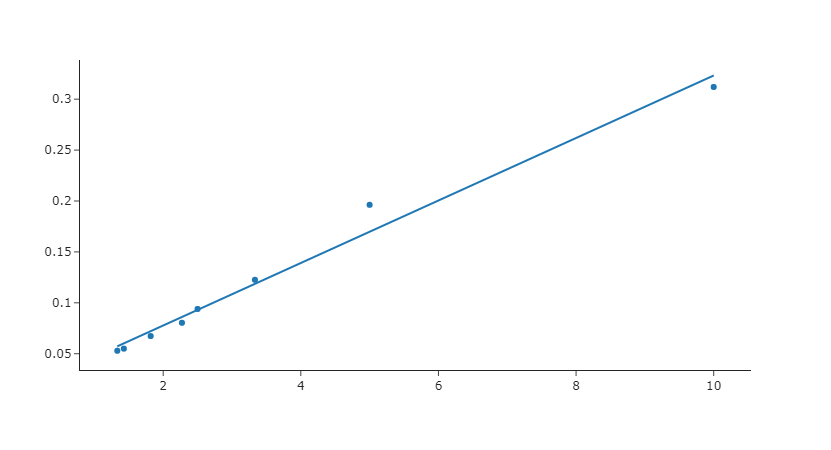

[0.00719062 0.00163544] [0.01632187 0.03069403]


/opt/conda/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=8



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     352.2
Date:                Mon, 17 May 2021   Prob (F-statistic):           1.48e-06
Time:                        22:19:55   Log-Likelihood:                 24.827
No. Observations:                   8   AIC:                            -45.65
Df Residuals:                       6   BIC:                            -45.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0163      0.007      2.270      0.064      -0.001       0.034
x1             0.0307      0.002     18.768      0.000       0.027       0.035
==============================================================================
Omnibus:                       12.398   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                4.314
Skew:                           1.620   Prob(JB):                        0.116
Kurtosis:                       4.563   Cond. No.                         7.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [318]:
Is=[0.1,0.2,0.3,0.4,0.44,0.55,0.7,0.75]
files=['100','200','300','400','440','550','700','750']
m=[]
for i in range(len(Is)):
    m.append(funcio(files[i],Is[i]))
Ip=np.array(Is)
Ip=1/(Ip)
fig=px.scatter(x=Ip,y=m,trendline='ols',template='simple_white')
fig.update_layout(
        xaxis_title = r'$I_p^{-1} \textrm{ (A)}^{-1}$',
        yaxis_title = r'$R \textrm{ (m)}$',
    )
fig.show()
fig.write_image("mag1.pdf",engine="kaleido")

ree= px.get_trendline_results(fig)
re= ree.iloc[0]["px_fit_results"].summary()

fit_results = px.get_trendline_results(fig).px_fit_results.iloc[0]

u=fit_results.bse
m=fit_results.params
print(u,m)
re

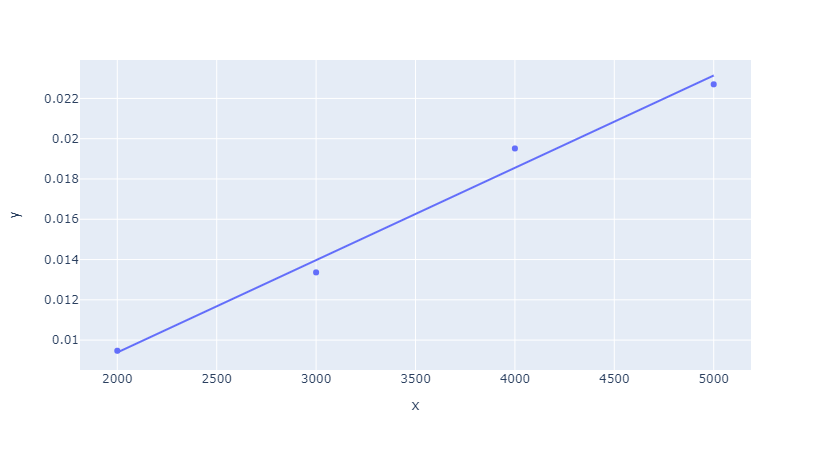

[1.42043955e-03 3.86594678e-07] [2.17419373e-04 4.58412810e-06]


/opt/conda/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 4 samples were given.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     140.6
Date:                Mon, 17 May 2021   Prob (F-statistic):            0.00704
Time:                        21:06:49   Log-Likelihood:                 23.924
No. Observations:                   4   AIC:                            -43.85
Df Residuals:                       2   BIC:                            -45.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.153      0.892      -0.006       0.006
x1          4.584e-06   3.87e-07     11.858      0.007    2.92e-06    6.25e-06
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.283
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.493
Skew:                           0.636   Prob(JB):                        0.782
Kurtosis:                       1.844   Cond. No.                     1.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [235]:
Vs=[2000,3000,4000,5000]
files=['2kv','3kv','4kv','5kv']
m=[]
for i in range(len(Vs)):
    m.append(funcio2(files[i],Vs[i]))
Ip=np.array(Vs)
# Ip=np.sqrt(Ip)
m=np.array(m)**2
fig=px.scatter(x=Ip,y=m,trendline='ols')
fig.show()
ree= px.get_trendline_results(fig)
re= ree.iloc[0]["px_fit_results"].summary()

fit_results = px.get_trendline_results(fig).px_fit_results.iloc[0]

u=fit_results.bse
m=fit_results.params
print(u,m)
re

NameError: name 'file' is not defined

In [18]:
m100['X']=-m100['X']/100-1/100
m100['Y']=-m100['Y']/100-1/100
m100['X^2']=m100['X']**2
m100['Y^2']=m100['Y']**2

m200['X']=-m200['X']/100
m200['Y']=-m200['Y']/100
m200['X^2']=m200['X']**2
m200['Y^2']=m200['Y']**2

m300['X']=-m300['X']/100
m300['Y']=-m300['Y']/100
m300['X^2']=m300['X']**2
m300['Y^2']=m300['Y']**2

m400['X']=-m400['X']/100
m400['Y']=-m400['Y']/100
m400['X^2']=m400['X']**2
m400['Y^2']=m400['Y']**2

m490['X']=-m490['X']/100
m490['Y']=-m490['Y']/100
m490['X^2']=m490['X']**2
m490['Y^2']=m490['Y']**2

m600['X']=-m600['X']/100
m600['Y']=-m600['Y']/100
m600['X^2']=m600['X']**2
m600['Y^2']=m600['Y']**2

m700['X']=-m700['X']/100
m700['Y']=-m700['Y']/100
m700['X^2']=m700['X']**2
m700['Y^2']=m700['Y']**2

m800['X']=-m800['X']/100
m800['Y']=-m800['Y']/100
m800['X^2']=m800['X']**2
m800['Y^2']=m800['Y']**2

In [36]:
f100=px.scatter(m100,x='X^2',y='Y',trendline="ols")
p100 = np.polyfit(m100['X'], m100['Y'], 2)

f200=px.scatter(m200,x='X^2',y='Y',trendline="ols")
p200 = np.polyfit(m200['X'], m200['Y'], 2)

f300=px.scatter(m300,x='X^2',y='Y',trendline="ols")
p300 = np.polyfit(m300['X'], m300['Y'], 2)

f400=px.scatter(m400,x='X^2',y='Y',trendline="ols")
p400 = np.polyfit(m400['X'], m400['Y'], 2)

f490=px.scatter(m490,x='X^2',y='Y',trendline="ols")
p490 = np.polyfit(m490['X'], m490['Y'], 2)

f600=px.scatter(m600,x='X^2',y='Y',trendline="ols")
p600 = np.polyfit(m600['X'], m600['Y'], 2)

f700=px.scatter(m700,x='X^2',y='Y',trendline="ols")
p700 = np.polyfit(m700['X'], m700['Y'], 2)

f800=px.scatter(m800,x='X^2',y='Y',trendline="ols")
p800 = np.polyfit(m800['X'], m800['Y'], 2)

print(p100,p200,p300,p400,p490,p600,p700,p800,sep='\n')

[-1.45097869e+02 -4.98263078e-02 -1.46463003e-05]
[-2.64860428e+00 -6.94054009e-02 -1.76918489e-03]
[-4.37174816e+00 -1.42571693e-01 -3.04542815e-03]
[-6.03346948e+00 -1.93344944e-01 -3.70067999e-03]
[-7.26870119e+00 -2.21830862e-01 -3.85695734e-03]
[-9.69636627e+00 -2.79875972e-01 -4.71648040e-03]
[-1.41507752e+01 -3.83885387e-01 -5.91080988e-03]
[-1.60373430e+01 -3.95779903e-01 -6.19722425e-03]


In [94]:
r100= px.get_trendline_results(f100)
r100 = r100.iloc[0]["px_fit_results"].summary()

r200= px.get_trendline_results(f200)
r200 = r200.iloc[0]["px_fit_results"].summary()

r300= px.get_trendline_results(f300)
r300 = r300.iloc[0]["px_fit_results"].summary()

r400= px.get_trendline_results(f400)
r400 = r400.iloc[0]["px_fit_results"].summary()

r490= px.get_trendline_results(f490)
r490 = r490.iloc[0]["px_fit_results"].summary()

r600= px.get_trendline_results(f600)
r600 = r600.iloc[0]["px_fit_results"].summary()

r700= px.get_trendline_results(f700)
r700 = r700.iloc[0]["px_fit_results"].summary()

r800= px.get_trendline_results(f800)
r800 = r800.iloc[0]["px_fit_results"].summary()
print(r800)
# print(r100,r200,r300,r400,r490,r600,r700,r800)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     741.8
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           3.30e-22
Time:                        22:44:07   Log-Likelihood:                 162.41
No. Observations:                  31   AIC:                            -320.8
Df Residuals:                      29   BIC:                            -318.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0072      0.000    -21.893      0.0

In [93]:
r800 = px.get_trendline_results(f800).px_fit_results.iloc[0]
print(r800.params)


[-7.17908607e-03 -3.26781357e+01]


In [88]:
r100.fit()

AttributeError: 'Summary' object has no attribute 'fit'